# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
from wordcloud import WordCloud
from scipy import signal
import scipy
#to supress warning
import warnings
warnings.filterwarnings('ignore')

#to make shell more intractive
from IPython.display import display

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

In [3]:
pwd

'E:\\DataScience\\MachineLearning\\Sonar vs Mine Prediction logistic regression'

In [4]:
import os
os.listdir()

['.ipynb_checkpoints', 'Sonar vs Mine Prediction.ipynb', 'SonarData.csv']

In [5]:
path ='E:\\DataScience\\MachineLearning\\Sonar vs Mine Prediction logistic regression'+'\\SonarData.csv'

# Data Collection & Data processing

In [6]:
#Loading the dataset to a pandas Dataframe
sonar_data = pd.read_csv(path,header=None)

In [7]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [8]:
#Number of rows and columns
sonar_data.shape

(208, 61)

In [9]:
#decription --> statistical measures of the data
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [10]:
sonar_data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [11]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

### Correlation heatmap

In [12]:
sonar_data.corr().style.background_gradient(cmap = 'rocket_r')

In [13]:
sonar_data.describe().T.style.background_gradient(cmap = 'rocket_r')

,count,mean,std,min,25%,50%,75%,max
0,208.000000,0.029164,0.022991,0.001500,0.013350,0.022800,0.035550,0.137100
1,208.000000,0.038437,0.032960,0.000600,0.016450,0.030800,0.047950,0.233900
2,208.000000,0.043832,0.038428,0.001500,0.018950,0.034300,0.057950,0.305900
3,208.000000,0.053892,0.046528,0.005800,0.024375,0.044050,0.064500,0.426400
4,208.000000,0.075202,0.055552,0.006700,0.038050,0.062500,0.100275,0.401000
5,208.000000,0.104570,0.059105,0.010200,0.067025,0.092150,0.134125,0.382300
6,208.000000,0.121747,0.061788,0.003300,0.080900,0.106950,0.154000,0.372900
7,208.000000,0.134799,0.085152,0.005500,0.080425,0.112100,0.169600,0.459000
8,208.000000,0.178003,0.118387,0.007500,0.097025,0.152250,0.233425,0.682800
9,208.000000,0.208259,0.134416,0.011300,0.111275,0.182400,0.268700,0.710600


### Barchart by rock and mine

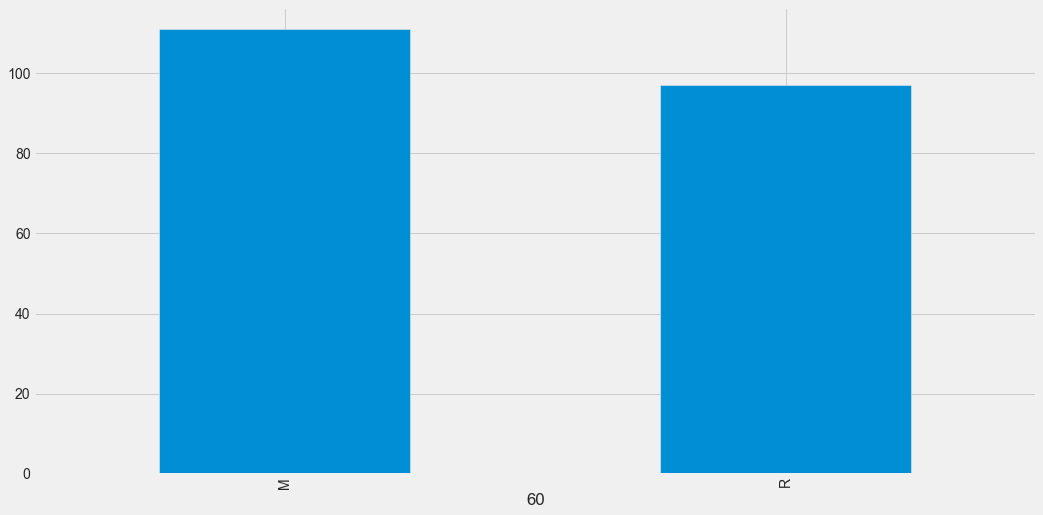

In [14]:
sonar_data.groupby(60)[60].count().plot.bar();

In [15]:
col=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
     17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
     34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
     51, 52, 53, 54, 55, 56, 57, 58, 59]

### Boxplot by features and rock & mine

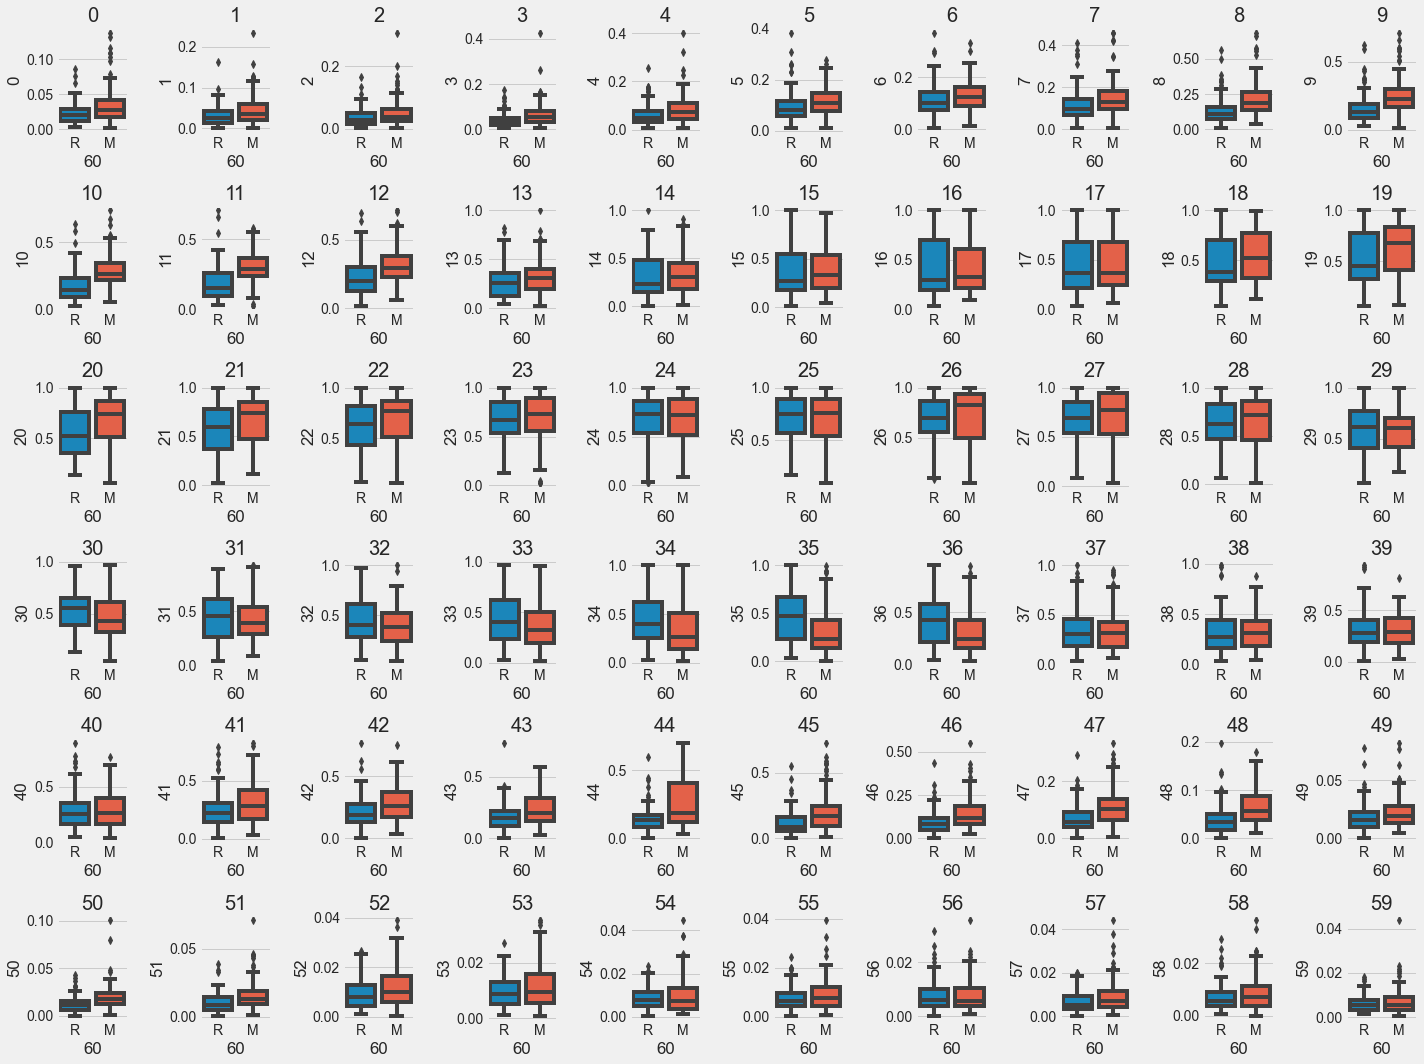

In [17]:
fig = plt.figure(figsize=(20,15))

for i in range(len(col)):
    plt.subplot(6,10,i+1)
    plt.title(col[i])
    sns.boxplot(data=sonar_data,y=sonar_data[col[i]],x=sonar_data[60])

plt.tight_layout()   
plt.show()

### Histplot by features and rock & mine

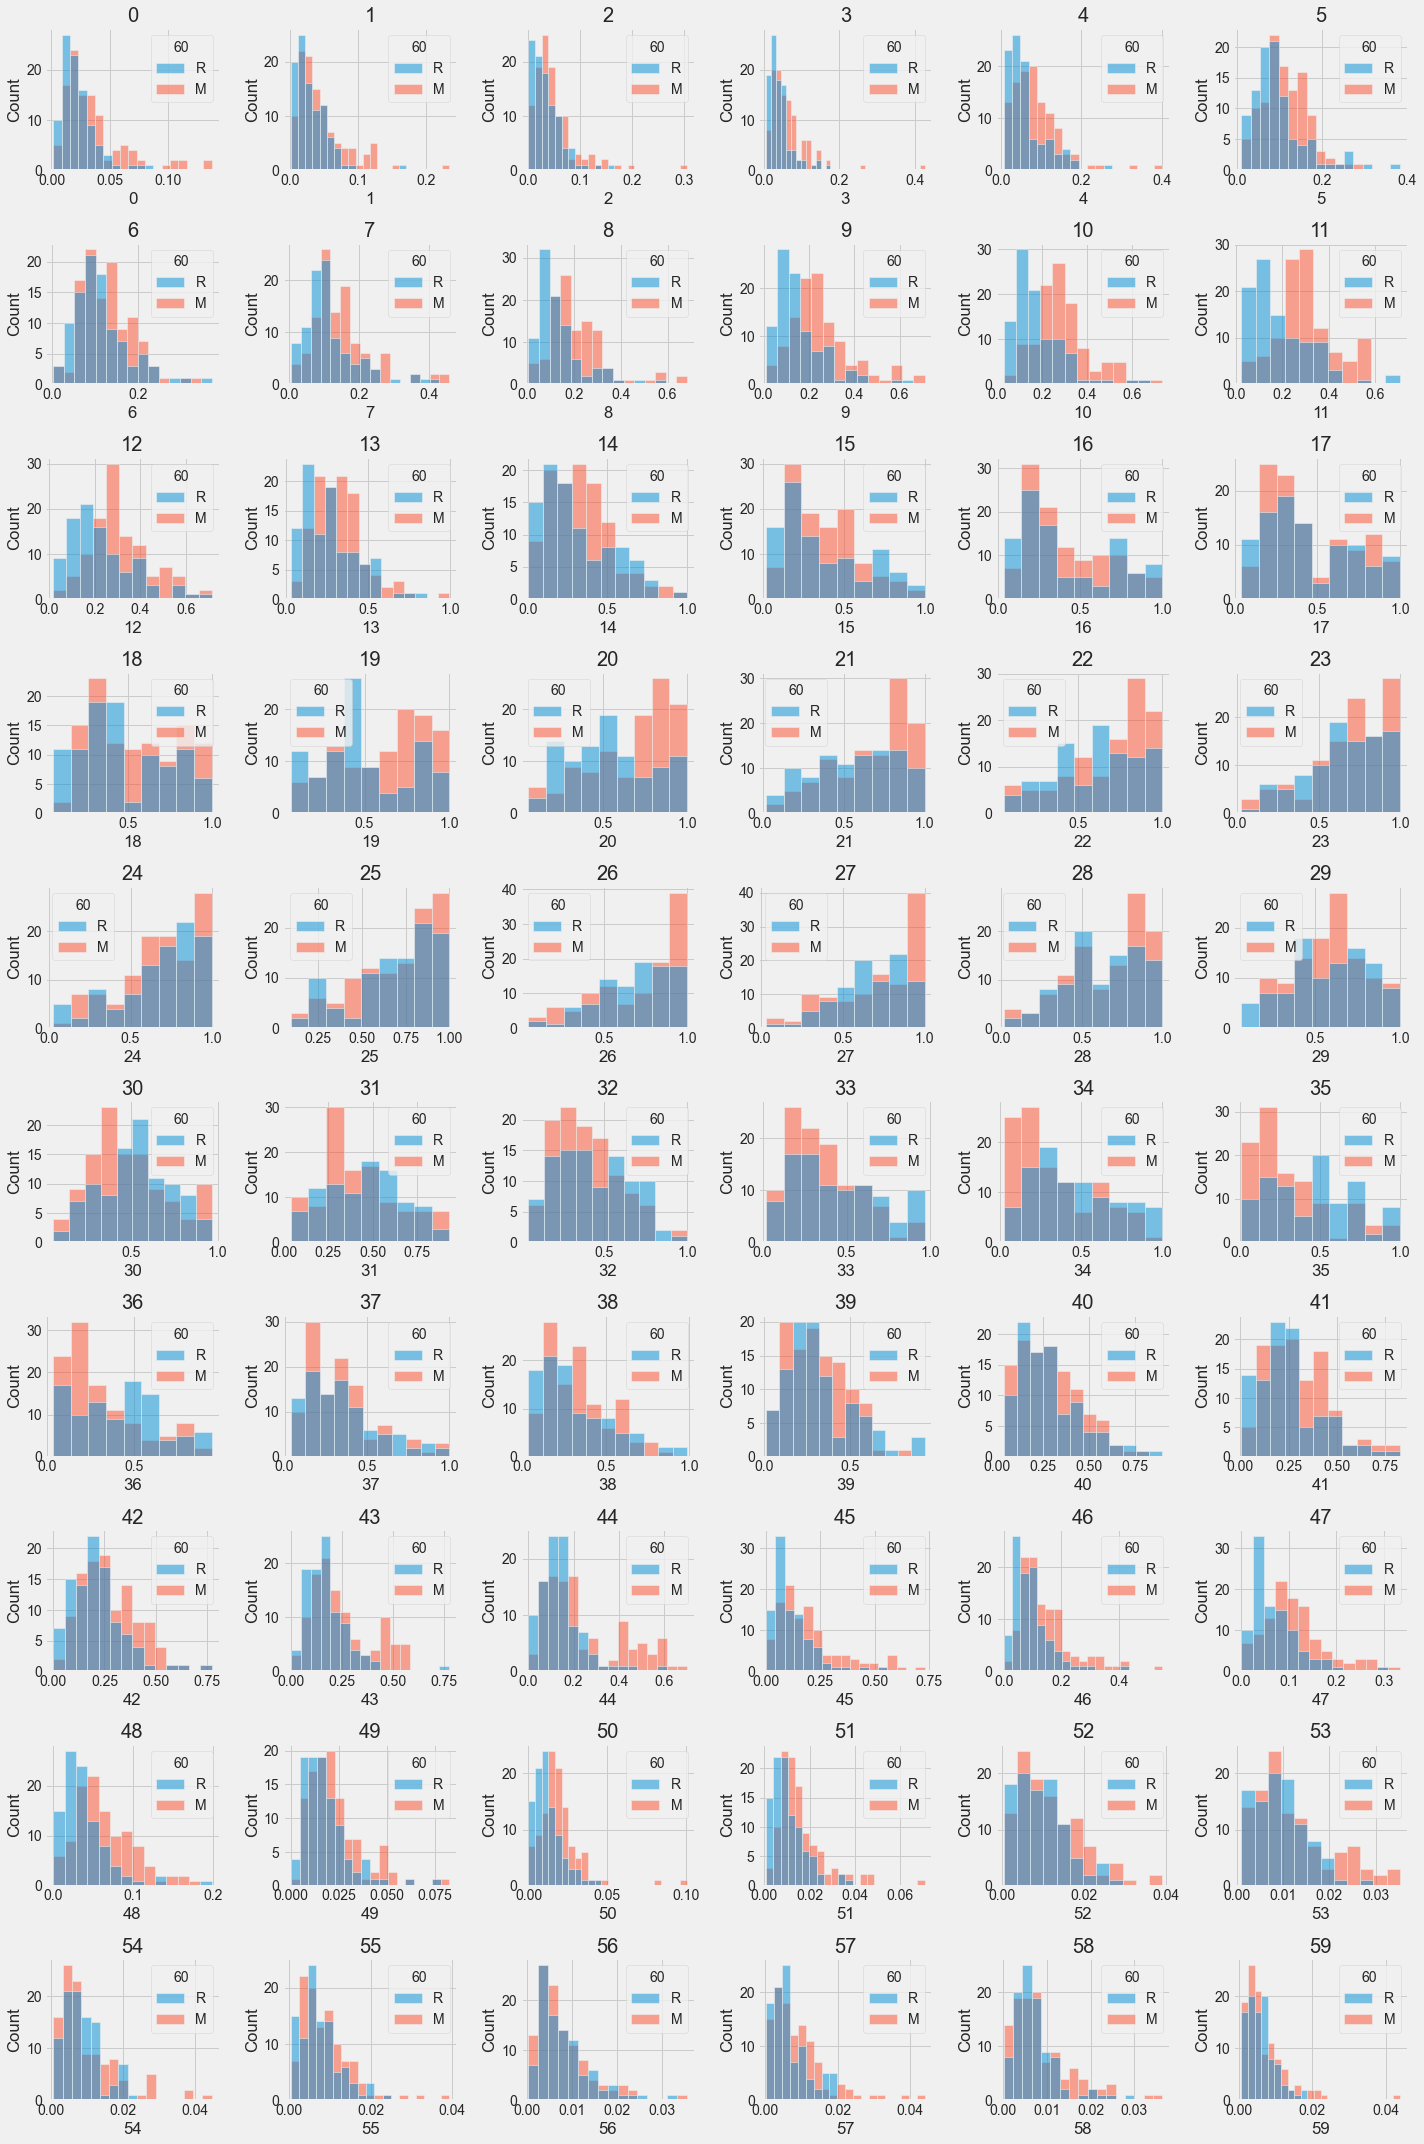

In [18]:
fig = plt.figure(figsize=(20,30))

for i in range(len(col)):
    plt.subplot(10,6,i+1)
    plt.title(col[i])
    sns.histplot(data=sonar_data,x=sonar_data[col[i]],hue=60)

plt.tight_layout()

In [20]:
sonar_data.groupby(60).mean().style.background_gradient(cmap = 'rocket_r')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,0.289581,0.301459,0.314426,0.320692,0.331182,0.380999,0.415007,0.455882,0.538062,0.617941,0.667426,0.672325,0.676701,0.689165,0.681204,0.706075,0.714754,0.712269,0.650283,0.581796,0.482378,0.428049,0.396577,0.366140,0.337553,0.318553,0.317034,0.331608,0.336365,0.305221,0.292594,0.300975,0.276883,0.248106,0.245225,0.198804,0.146917,0.110594,0.063708,0.022721,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,0.174713,0.191589,0.226249,0.268963,0.307636,0.375611,0.417100,0.448240,0.466762,0.500229,0.542270,0.569290,0.612959,0.653761,0.668809,0.692762,0.687737,0.673145,0.632680,0.579934,0.529762,0.451619,0.440841,0.445680,0.455530,0.460710,0.417330,0.348868,0.313709,0.318057,0.285428,0.252338,0.211822,0.175132,0.142312,0.116949,0.094458,0.069488,0.038449,0.017796,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


## Evaluate Algorithms

In [33]:
import operator 
## Preprocessing 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import (cross_val_score, KFold,
                                     StratifiedKFold, train_test_split,
                                     GridSearchCV)
from sklearn.metrics import confusion_matrix, classification_report

## Piprline 
from sklearn.pipeline import make_pipeline 

### Linear Estimatiors
from sklearn.linear_model import LogisticRegression, SGDClassifier
### non Linear Estimatiors 
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier 
### Ensemble Estimatiors 

from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier) 
### Metrics
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix,
                             classification_report,RocCurveDisplay)

In [34]:
X = sonar_data.drop(columns=60, axis=1)
y = sonar_data[60]
'''
I split our data into Training and testing sets,
I specified my test size to 15% of the dataset 
and last, I chose a random state of 101
'''
X_train, X_test, y_train, y_test =train_test_split(
                            X,y,test_size=0.15, random_state = 101)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
np.random.seed(101)
models = {
    'LogisticRegression': LogisticRegression(),
    'SGDClassifier': SGDClassifier(),
    'LinearSVC': LinearSVC(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
}

Skfold = StratifiedKFold(n_splits = 13)
metrics = ['accuracy']

In [36]:
np.random.seed(101)
score ={}
def mod(model):
    for k,v in model.items():
        v.fit(X_train, y_train)
        score[k] = np.round(cross_val_score(estimator= v,
                                            X= X_test,y= y_test, cv= Skfold, scoring = 'accuracy').mean(), 4)
    best = max(score.items(), key=operator.itemgetter(1))[0]
    print(f'Best Estimator : {best} with score = {100*score[best]:.2f}')
            
    return score
mod(models)

Best Estimator : GradientBoostingClassifier with score = 89.74


{'LogisticRegression': 0.859,
 'SGDClassifier': 0.859,
 'LinearSVC': 0.7821,
 'SVC': 0.7564,
 'KNeighborsClassifier': 0.6538,
 'RandomForestClassifier': 0.8846,
 'AdaBoostClassifier': 0.8718,
 'GradientBoostingClassifier': 0.8974}

Best Estimator : AdaBoostClassifier with score = 87.18


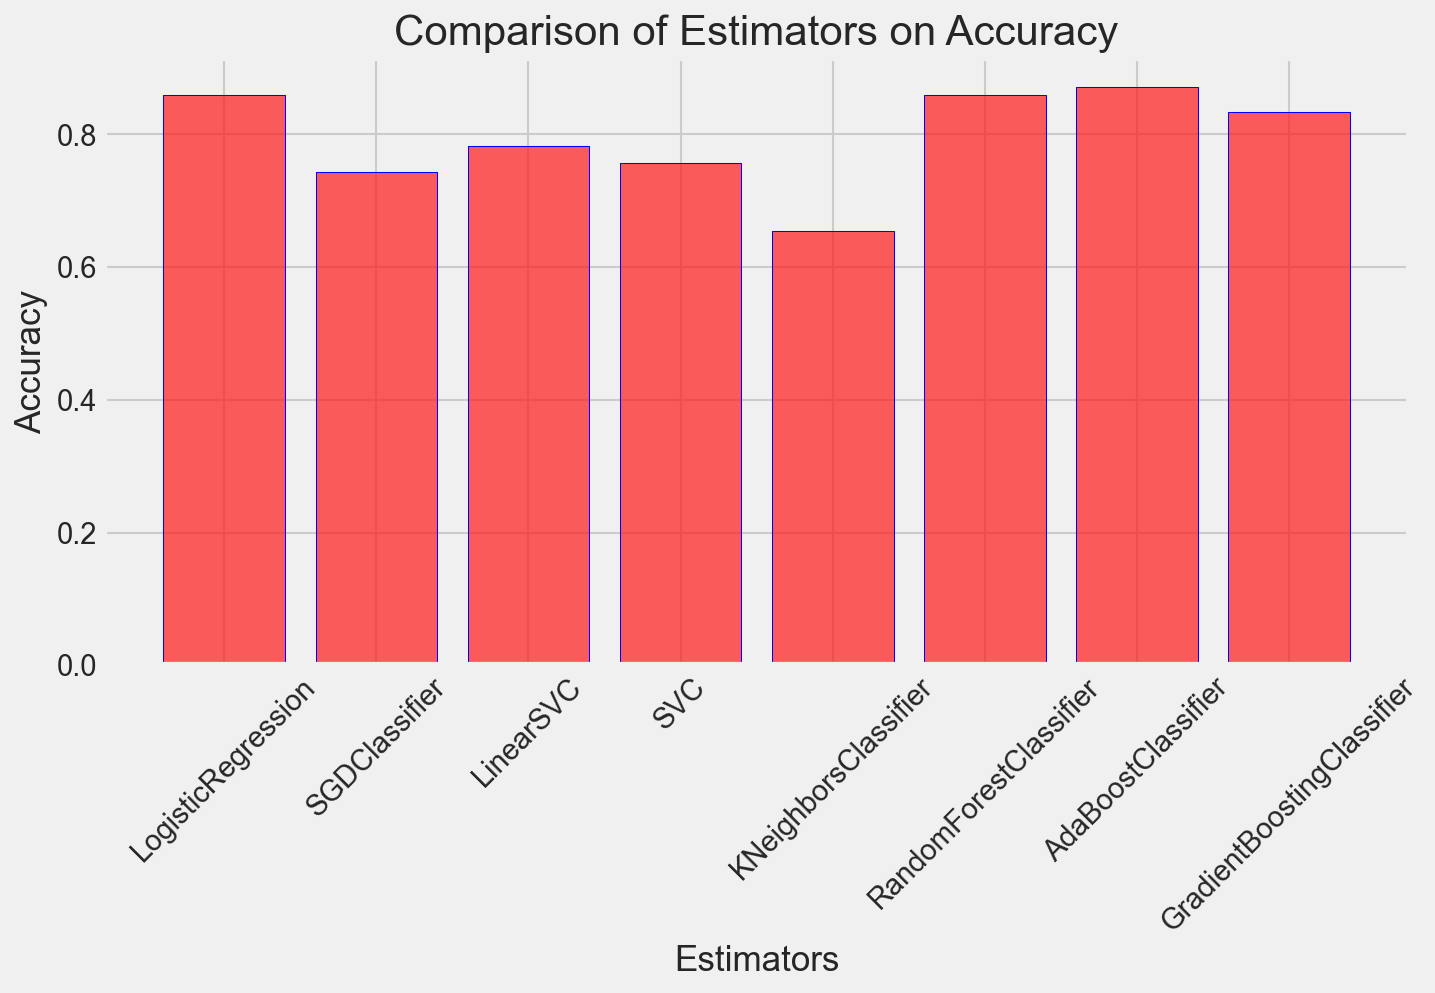

In [37]:
# compare algorithms
results=mod(models)
estimators = list(results.keys())
score = list(results.values())


fig =  plt.figure(figsize= (10,5), dpi = 150)
plt.bar(range(len(results)), score, tick_label = estimators,
        color=(1, 0.1, 0.1, 0.7),  edgecolor='blue')
plt.xticks(rotation=45)
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.title('Comparison of Estimators on Accuracy');